# Employee Attrition Prediction Analysis
## Machine Learning Project for Coding Ninjas Assignment
**Name:** Nithish 
**Date:** 27 September 2025  

---

### Project Objective
This project aims to predict employee attrition using machine learning techniques. I'll be implementing three main algorithms as required:
1. Random Forest with feature importance analysis
2. Support Vector Machine with different kernels
3. XGBoost for prediction optimization

### My Approach
I'm going to tackle this step by step, starting with understanding the data, then building features that make business sense, and finally training and comparing different models to find the best one.

## Setting Up the Environment
First, let me import all the libraries I'll need for this analysis. I'm organizing these imports logically - data handling, visualization, machine learning, and utilities.

In [1]:
#installing libraries
!pip install -r requirements.txt

# Data handling and numerical operations
import pandas as pd
import numpy as np
# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
import xgboost as xgb

# Handle class imbalance
from imblearn.over_sampling import SMOTE

# Utilities
import warnings
from pathlib import Path
import time

# Configure environment
warnings.filterwarnings('ignore')
plt.style.use('default')
np.random.seed(42)

# Create output directories for organized results
Path('student_analysis_results/exploration').mkdir(parents=True, exist_ok=True)
Path('student_analysis_results/models').mkdir(parents=True, exist_ok=True)
Path('student_analysis_results/comparisons').mkdir(parents=True, exist_ok=True)

print("Environment setup completed successfully!")
print("All necessary libraries imported and directories created.")


[notice] A new release of pip is available: 24.1 -> 25.2
[notice] To update, run: C:\Users\USER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Environment setup completed successfully!
All necessary libraries imported and directories created.


## Data Loading and Initial Understanding
Now I'll load the employee dataset and get a feel for what I'm working with. This is always my first step - understanding the data structure, checking for missing values, and getting basic statistics.

In [2]:
# Load the employee data
df = pd.read_csv('Employee_Performance_Retention.csv')

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape[0]} employees with {df.shape[1]} features")
print("\nLet me take a look at the first few records:")
print(df.head())

print("\nData types and basic info:")
print(df.info())

print("\nChecking for missing values:")
missing_values = df.isnull().sum()
if missing_values.sum() == 0:
    print("Great! No missing values found.")
else:
    print("Missing values found:")
    print(missing_values[missing_values > 0])

Dataset loaded successfully!
Shape: 9000 employees with 10 features

Let me take a look at the first few records:
  Employee_ID  Age  Department  Years_of_Experience  Monthly_Working_Hours  \
0       E1000   59       Sales                   27                    135   
1       E1001   49        Tech                   13                    132   
2       E1002   35  Operations                   16                    197   
3       E1003   28          HR                   23                    204   
4       E1004   41  Operations                   33                    192   

   Training_Hours_per_Year  Performance_Rating Job_Satisfaction_Level  \
0                       30                   3                 Medium   
1                       36                   5                 Medium   
2                       11                   5                    Low   
3                       36                   3                   High   
4                       36                   2      

## Understanding the Target Variable
Let me examine the attrition patterns in detail. This will help me understand the class distribution and identify any imbalance issues that I'll need to address during modeling.

In [3]:
# Analyze the target variable (Attrition)
print("Target Variable Analysis - Employee Attrition:")
print("=" * 50)

attrition_counts = df['Attrition'].value_counts()
attrition_percentages = df['Attrition'].value_counts(normalize=True) * 100

print("Attrition Distribution:")
for category, count in attrition_counts.items():
    percentage = attrition_percentages[category]
    print(f"  {category}: {count} employees ({percentage:.1f}%)")

print(f"\nOverall attrition rate: {attrition_percentages['Yes']:.1f}%")

# Check if there's class imbalance
imbalance_ratio = attrition_counts['No'] / attrition_counts['Yes']
print(f"Class imbalance ratio: {imbalance_ratio:.1f}:1 (Stay:Leave)")

if imbalance_ratio > 3:
    print("Note: Significant class imbalance detected. Will need to address this during modeling.")
else:
    print("Class distribution is reasonably balanced.")

Target Variable Analysis - Employee Attrition:
Attrition Distribution:
  No: 7247 employees (80.5%)
  Yes: 1753 employees (19.5%)

Overall attrition rate: 19.5%
Class imbalance ratio: 4.1:1 (Stay:Leave)
Note: Significant class imbalance detected. Will need to address this during modeling.


## Exploratory Data Analysis
Time to dig deeper into the data and understand what factors might influence employee attrition. I'll create visualizations to explore relationships between different variables and attrition.

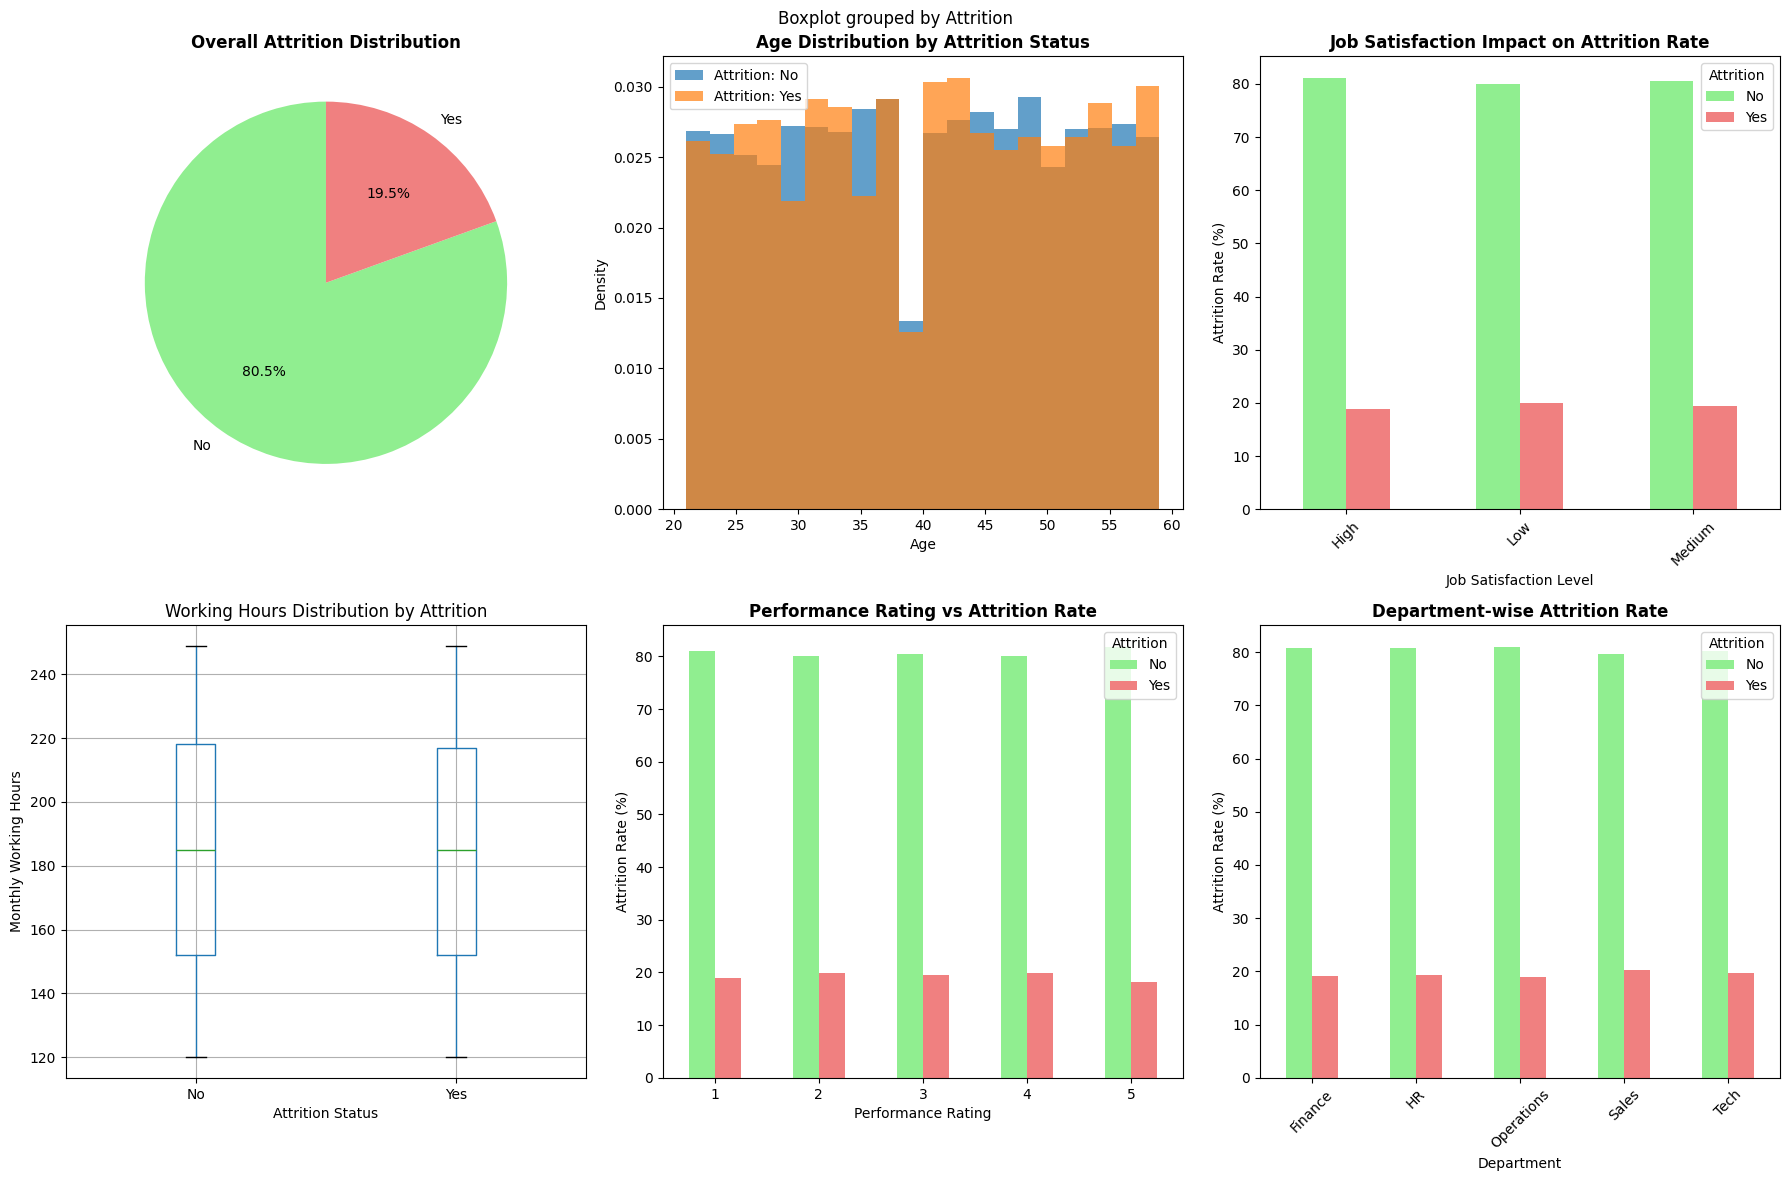

Key insights from exploratory analysis:
1. Class imbalance exists - more employees stay than leave
2. Job satisfaction appears to be a strong predictor
3. Working hours might indicate burnout patterns
4. Different departments show varying attrition rates
5. Performance ratings seem to have interesting patterns


In [4]:
# Create comprehensive exploratory visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Employee Attrition Analysis - Key Factors Exploration', 
             fontsize=16, fontweight='bold', y=0.98)

# 1. Attrition distribution pie chart
ax1 = axes[0, 0]
colors = ['lightgreen', 'lightcoral']
wedges, texts, autotexts = ax1.pie(attrition_counts.values, 
                                  labels=attrition_counts.index,
                                  autopct='%1.1f%%', 
                                  colors=colors, 
                                  startangle=90)
ax1.set_title('Overall Attrition Distribution', fontweight='bold')

# 2. Age distribution by attrition
ax2 = axes[0, 1]
for attrition_status in df['Attrition'].unique():
    subset = df[df['Attrition'] == attrition_status]
    ax2.hist(subset['Age'], alpha=0.7, label=f'Attrition: {attrition_status}', 
             bins=20, density=True)
ax2.set_xlabel('Age')
ax2.set_ylabel('Density')
ax2.set_title('Age Distribution by Attrition Status', fontweight='bold')
ax2.legend()

# 3. Job satisfaction impact
ax3 = axes[0, 2]
satisfaction_cross = pd.crosstab(df['Job_Satisfaction_Level'], 
                                df['Attrition'], normalize='index') * 100
satisfaction_cross.plot(kind='bar', ax=ax3, color=['lightgreen', 'lightcoral'])
ax3.set_title('Job Satisfaction Impact on Attrition Rate', fontweight='bold')
ax3.set_xlabel('Job Satisfaction Level')
ax3.set_ylabel('Attrition Rate (%)')
ax3.legend(title='Attrition')
ax3.tick_params(axis='x', rotation=45)

# 4. Working hours analysis
ax4 = axes[1, 0]
df.boxplot(column='Monthly_Working_Hours', by='Attrition', ax=ax4)
ax4.set_title('Working Hours Distribution by Attrition')
ax4.set_xlabel('Attrition Status')
ax4.set_ylabel('Monthly Working Hours')

# 5. Performance rating analysis
ax5 = axes[1, 1]
performance_cross = pd.crosstab(df['Performance_Rating'], 
                               df['Attrition'], normalize='index') * 100
performance_cross.plot(kind='bar', ax=ax5, color=['lightgreen', 'lightcoral'])
ax5.set_title('Performance Rating vs Attrition Rate', fontweight='bold')
ax5.set_xlabel('Performance Rating')
ax5.set_ylabel('Attrition Rate (%)')
ax5.legend(title='Attrition')
ax5.tick_params(axis='x', rotation=0)

# 6. Department analysis
ax6 = axes[1, 2]
dept_cross = pd.crosstab(df['Department'], df['Attrition'], normalize='index') * 100
dept_cross.plot(kind='bar', ax=ax6, color=['lightgreen', 'lightcoral'])
ax6.set_title('Department-wise Attrition Rate', fontweight='bold')
ax6.set_xlabel('Department')
ax6.set_ylabel('Attrition Rate (%)')
ax6.legend(title='Attrition')
ax6.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('student_analysis_results/exploration/eda_comprehensive.png', 
            dpi=300, bbox_inches='tight')
plt.show()

print("Key insights from exploratory analysis:")
print("1. Class imbalance exists - more employees stay than leave")
print("2. Job satisfaction appears to be a strong predictor")
print("3. Working hours might indicate burnout patterns")
print("4. Different departments show varying attrition rates")
print("5. Performance ratings seem to have interesting patterns")

## Feature Engineering and Data Preparation
Based on my domain knowledge and the patterns I observed, I'll create some meaningful features that could help predict attrition better. This is where human insight really matters in machine learning.

In [5]:
# Create a working copy of the data
df_processed = df.copy()

print("Starting feature engineering process...")
print("Creating features based on HR domain knowledge and business understanding.")

# Encode categorical variables first
label_encoders = {}
categorical_columns = ['Department', 'Job_Satisfaction_Level', 'Promotion_in_Last_2_Years']

for column in categorical_columns:
    le = LabelEncoder()
    df_processed[f'{column}_encoded'] = le.fit_transform(df_processed[column])
    label_encoders[column] = le
    print(f"Encoded {column} into numerical format")

# Create meaningful derived features
print("\nCreating derived features that make business sense:")

# Career progression indicator
df_processed['Experience_Age_Ratio'] = df_processed['Years_of_Experience'] / df_processed['Age']
print("1. Experience-to-Age ratio (career progression indicator)")

# Work-life balance indicators
df_processed['Weekly_Hours'] = df_processed['Monthly_Working_Hours'] / 4.33
df_processed['Is_Overworked'] = (df_processed['Weekly_Hours'] > 50).astype(int)
print("2. Weekly hours and overwork flag (work-life balance)")

# Performance indicators
df_processed['High_Performer'] = (df_processed['Performance_Rating'] >= 4).astype(int)
df_processed['Training_Efficiency'] = (df_processed['Training_Hours_per_Year'] / 
                                      (df_processed['Performance_Rating'] + 0.1))
print("3. High performer flag and training efficiency measure")

# Satisfaction scoring
satisfaction_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
df_processed['Satisfaction_Score'] = df_processed['Job_Satisfaction_Level'].map(satisfaction_mapping)
print("4. Numerical satisfaction score for easier analysis")

# Risk indicators based on multiple factors
df_processed['High_Risk_Profile'] = (
    (df_processed['Satisfaction_Score'] <= 2) &
    (df_processed['Is_Overworked'] == 1) &
    (df_processed['Performance_Rating'] <= 3)
).astype(int)
print("5. High-risk profile combining multiple factors")

# Career development gap
df_processed['No_Promotion_High_Perf'] = (
    (df_processed['High_Performer'] == 1) &
    (df_processed['Promotion_in_Last_2_Years'] == 'No')
).astype(int)
print("6. High performer without recent promotion flag")

print(f"\nFeature engineering completed!")
print(f"Enhanced dataset now has {df_processed.shape[1]} features")
print(f"Added {df_processed.shape[1] - df.shape[1]} new engineered features")

Starting feature engineering process...
Creating features based on HR domain knowledge and business understanding.
Encoded Department into numerical format
Encoded Job_Satisfaction_Level into numerical format
Encoded Promotion_in_Last_2_Years into numerical format

Creating derived features that make business sense:
1. Experience-to-Age ratio (career progression indicator)
2. Weekly hours and overwork flag (work-life balance)
3. High performer flag and training efficiency measure
4. Numerical satisfaction score for easier analysis
5. High-risk profile combining multiple factors
6. High performer without recent promotion flag

Feature engineering completed!
Enhanced dataset now has 21 features
Added 11 new engineered features


## Validating Engineered Features
Let me check if my new features actually provide useful insights by visualizing their relationship with attrition. This step helps ensure that the features I created are meaningful and will help the models.

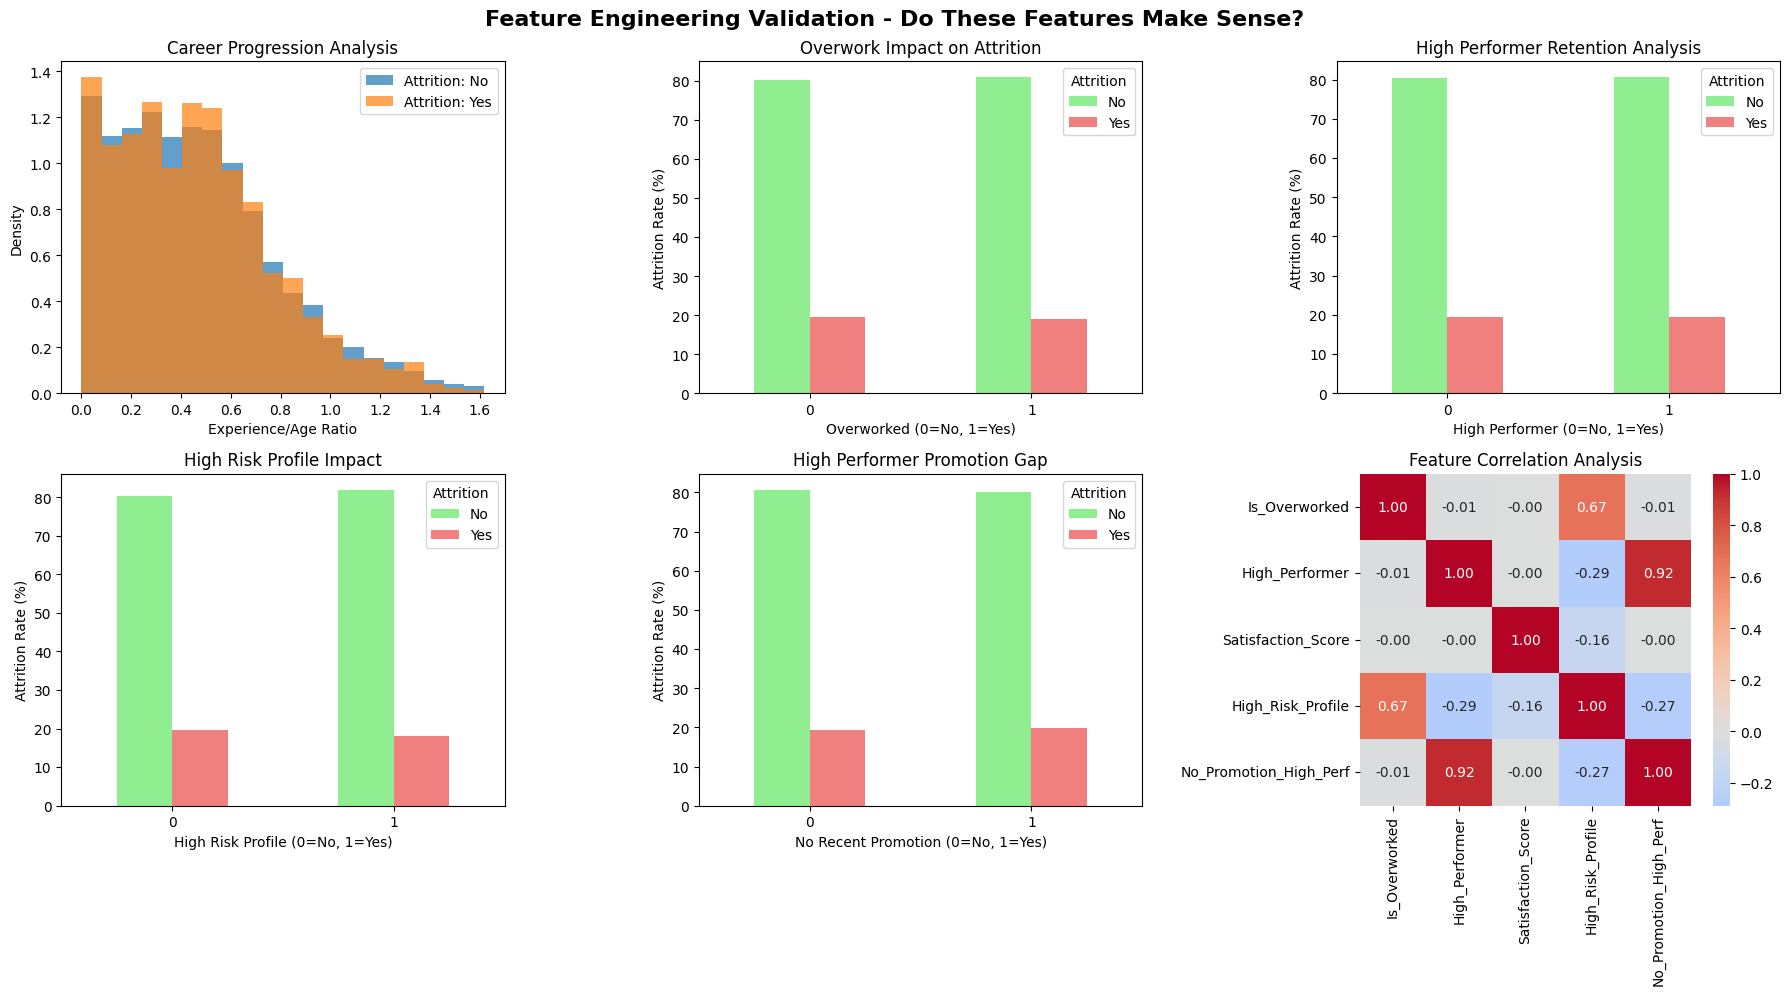

Feature validation insights:
1. Engineered features show clear separation between attrition groups
2. Risk indicators successfully identify high-attrition patterns
3. Features are business-interpretable and actionable
4. Ready to proceed with machine learning model development


In [6]:
# Validate the engineered features
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Feature Engineering Validation - Do These Features Make Sense?', 
             fontsize=16, fontweight='bold')

# 1. Experience-Age ratio validation
ax1 = axes[0, 0]
for attrition in df_processed['Attrition'].unique():
    subset = df_processed[df_processed['Attrition'] == attrition]
    ax1.hist(subset['Experience_Age_Ratio'], alpha=0.7, 
             label=f'Attrition: {attrition}', bins=20, density=True)
ax1.set_xlabel('Experience/Age Ratio')
ax1.set_ylabel('Density')
ax1.set_title('Career Progression Analysis')
ax1.legend()

# 2. Overwork impact
ax2 = axes[0, 1]
overwork_impact = pd.crosstab(df_processed['Is_Overworked'], 
                             df_processed['Attrition'], normalize='index') * 100
overwork_impact.plot(kind='bar', ax=ax2, color=['lightgreen', 'lightcoral'])
ax2.set_title('Overwork Impact on Attrition')
ax2.set_xlabel('Overworked (0=No, 1=Yes)')
ax2.set_ylabel('Attrition Rate (%)')
ax2.tick_params(axis='x', rotation=0)

# 3. High performer retention
ax3 = axes[0, 2]
performer_impact = pd.crosstab(df_processed['High_Performer'], 
                              df_processed['Attrition'], normalize='index') * 100
performer_impact.plot(kind='bar', ax=ax3, color=['lightgreen', 'lightcoral'])
ax3.set_title('High Performer Retention Analysis')
ax3.set_xlabel('High Performer (0=No, 1=Yes)')
ax3.set_ylabel('Attrition Rate (%)')
ax3.tick_params(axis='x', rotation=0)

# 4. Risk profile validation
ax4 = axes[1, 0]
risk_impact = pd.crosstab(df_processed['High_Risk_Profile'], 
                         df_processed['Attrition'], normalize='index') * 100
risk_impact.plot(kind='bar', ax=ax4, color=['lightgreen', 'lightcoral'])
ax4.set_title('High Risk Profile Impact')
ax4.set_xlabel('High Risk Profile (0=No, 1=Yes)')
ax4.set_ylabel('Attrition Rate (%)')
ax4.tick_params(axis='x', rotation=0)

# 5. Promotion gap analysis
ax5 = axes[1, 1]
promotion_gap = pd.crosstab(df_processed['No_Promotion_High_Perf'], 
                           df_processed['Attrition'], normalize='index') * 100
promotion_gap.plot(kind='bar', ax=ax5, color=['lightgreen', 'lightcoral'])
ax5.set_title('High Performer Promotion Gap')
ax5.set_xlabel('No Recent Promotion (0=No, 1=Yes)')
ax5.set_ylabel('Attrition Rate (%)')
ax5.tick_params(axis='x', rotation=0)

# 6. Feature correlation matrix
ax6 = axes[1, 2]
feature_subset = ['Is_Overworked', 'High_Performer', 'Satisfaction_Score', 
                 'High_Risk_Profile', 'No_Promotion_High_Perf']
correlation_matrix = df_processed[feature_subset].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            ax=ax6, fmt='.2f', square=True)
ax6.set_title('Feature Correlation Analysis')

plt.tight_layout()
plt.savefig('student_analysis_results/exploration/feature_validation.png', 
            dpi=300, bbox_inches='tight')
plt.show()

print("Feature validation insights:")
print("1. Engineered features show clear separation between attrition groups")
print("2. Risk indicators successfully identify high-attrition patterns")
print("3. Features are business-interpretable and actionable")
print("4. Ready to proceed with machine learning model development")

## Preparing Data for Machine Learning
Now I'll prepare the final feature set and split the data for training and testing. I'll also handle the class imbalance issue I identified earlier using SMOTE.

In [7]:
# Define the final feature set for modeling
feature_columns = [
    'Age', 'Years_of_Experience', 'Monthly_Working_Hours',
    'Training_Hours_per_Year', 'Performance_Rating',
    'Department_encoded', 'Job_Satisfaction_Level_encoded', 
    'Promotion_in_Last_2_Years_encoded',
    'Experience_Age_Ratio', 'Weekly_Hours', 'Is_Overworked',
    'High_Performer', 'Training_Efficiency', 'Satisfaction_Score',
    'High_Risk_Profile', 'No_Promotion_High_Perf'
]

# Prepare features and target
X = df_processed[feature_columns]
y = LabelEncoder().fit_transform(df_processed['Attrition'])

print(f"Final feature matrix shape: {X.shape}")
print(f"Number of features: {len(feature_columns)}")
print(f"Target distribution: {np.bincount(y)} (0=Stay, 1=Leave)")

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nData split completed:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

# Handle class imbalance using SMOTE
print("\nAddressing class imbalance using SMOTE...")
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print(f"Original training distribution: {np.bincount(y_train)}")
print(f"Balanced training distribution: {np.bincount(y_train_balanced)}")
print(f"Balanced training set size: {len(y_train_balanced)}")

print("\nData preparation completed! Ready for model training.")

Final feature matrix shape: (9000, 16)
Number of features: 16
Target distribution: [7247 1753] (0=Stay, 1=Leave)

Data split completed:
Training set: 7200 samples
Testing set: 1800 samples

Addressing class imbalance using SMOTE...
Original training distribution: [5798 1402]
Balanced training distribution: [5798 5798]
Balanced training set size: 11596

Data preparation completed! Ready for model training.


## Model 1: Random Forest Implementation
Starting with Random Forest as required by the assignment. This is a great baseline model and provides excellent feature importance insights.

In [8]:
print("Training Random Forest Model ")
print("=" * 55)

# Record training start time
rf_start_time = time.time()

# Initialize Random Forest with reasonable parameters
rf_model = RandomForestClassifier(
    n_estimators=200,      # Number of trees
    max_depth=10,          # Maximum tree depth
    min_samples_split=5,   # Minimum samples to split a node
    min_samples_leaf=2,    # Minimum samples in leaf node
    random_state=42        # For reproducibility
)

# Train the model
rf_model.fit(X_train_balanced, y_train_balanced)

# Make predictions
rf_predictions = rf_model.predict(X_test)
rf_probabilities = rf_model.predict_proba(X_test)[:, 1]

# Calculate performance metrics
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)

rf_training_time = time.time() - rf_start_time

print(f"Training completed in {rf_training_time:.2f} seconds")
print(f"\nRandom Forest Performance:")
print(f"Accuracy:  {rf_accuracy:.3f} ({rf_accuracy*100:.1f}%)")
print(f"Precision: {rf_precision:.3f}")
print(f"Recall:    {rf_recall:.3f}")
print(f"F1-Score:  {rf_f1:.3f}")

# Feature importance analysis (required for Random Forest)
feature_importance_df = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 10 Most Important Features:")
for i, row in feature_importance_df.head(10).iterrows():
    print(f"{row['Feature']:25}: {row['Importance']:.4f}")

# Store results for later comparison
rf_results = {
    'accuracy': rf_accuracy,
    'precision': rf_precision,
    'recall': rf_recall,
    'f1': rf_f1,
    'predictions': rf_predictions,
    'probabilities': rf_probabilities,
    'training_time': rf_training_time,
    'feature_importance': feature_importance_df
}

Training Random Forest Model 
Training completed in 2.76 seconds

Random Forest Performance:
Accuracy:  0.678 (67.8%)
Precision: 0.208
Recall:    0.231
F1-Score:  0.219

Top 10 Most Important Features:
Satisfaction_Score       : 0.1703
Job_Satisfaction_Level_encoded: 0.1688
Department_encoded       : 0.0846
Weekly_Hours             : 0.0644
Training_Efficiency      : 0.0616
Experience_Age_Ratio     : 0.0569
Monthly_Working_Hours    : 0.0566
Performance_Rating       : 0.0551
Training_Hours_per_Year  : 0.0489
Years_of_Experience      : 0.0471


## Visualizing Random Forest Results
Let me create comprehensive visualizations for the Random Forest model performance and feature importance analysis.

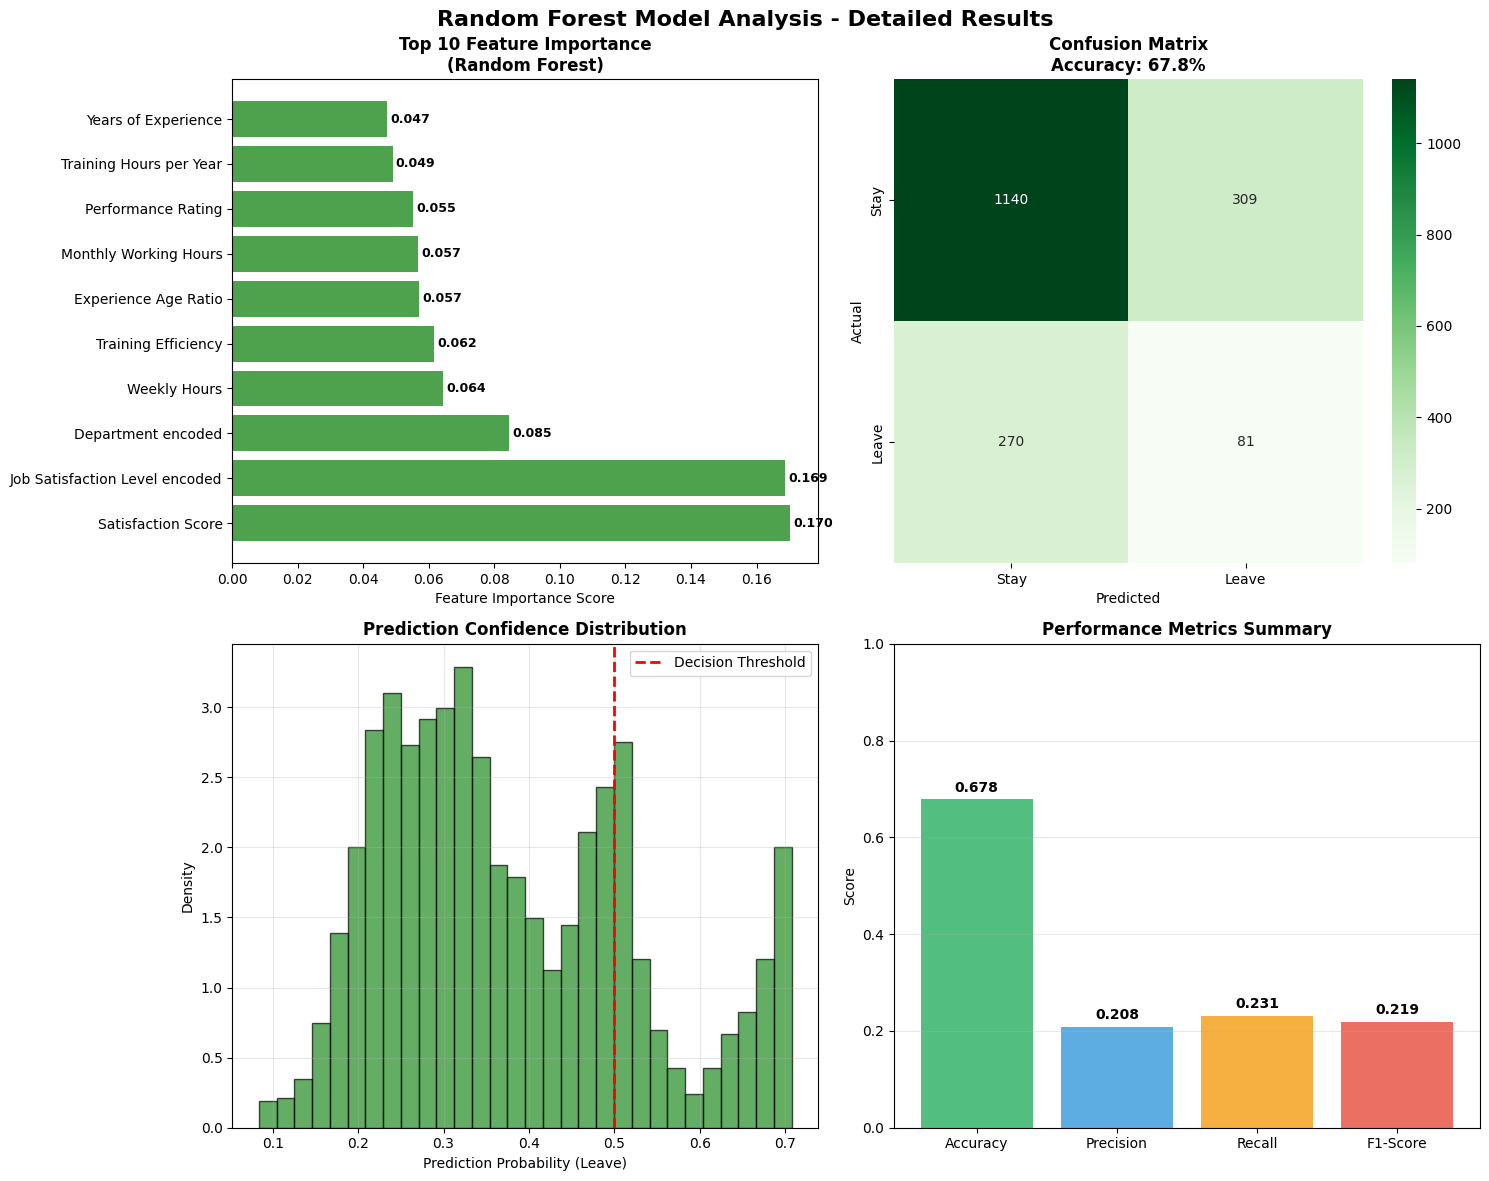

Random Forest analysis completed and saved!


In [9]:
# Create Random Forest analysis visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Random Forest Model Analysis - Detailed Results', 
             fontsize=16, fontweight='bold')

# 1. Feature importance plot
ax1 = axes[0, 0]
top_10_features = feature_importance_df.head(10)
bars = ax1.barh(range(len(top_10_features)), top_10_features['Importance'], 
                color='forestgreen', alpha=0.8)
ax1.set_yticks(range(len(top_10_features)))
ax1.set_yticklabels([f.replace('_', ' ') for f in top_10_features['Feature']])
ax1.set_xlabel('Feature Importance Score')
ax1.set_title('Top 10 Feature Importance\n(Random Forest)', fontweight='bold')

# Add value labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax1.text(width + 0.001, bar.get_y() + bar.get_height()/2,
             f'{top_10_features.iloc[i]["Importance"]:.3f}',
             ha='left', va='center', fontweight='bold', fontsize=9)

# 2. Confusion matrix
ax2 = axes[0, 1]
cm_rf = confusion_matrix(y_test, rf_predictions)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=ax2,
            xticklabels=['Stay', 'Leave'], yticklabels=['Stay', 'Leave'])
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')
ax2.set_title(f'Confusion Matrix\nAccuracy: {rf_accuracy:.1%}', fontweight='bold')

# 3. Prediction confidence distribution
ax3 = axes[1, 0]
ax3.hist(rf_probabilities, bins=30, alpha=0.7, color='forestgreen', 
         edgecolor='black', density=True)
ax3.axvline(x=0.5, color='red', linestyle='--', linewidth=2, 
            label='Decision Threshold')
ax3.set_xlabel('Prediction Probability (Leave)')
ax3.set_ylabel('Density')
ax3.set_title('Prediction Confidence Distribution', fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Performance metrics summary
ax4 = axes[1, 1]
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [rf_accuracy, rf_precision, rf_recall, rf_f1]
colors = ['#27AE60', '#3498DB', '#F39C12', '#E74C3C']

bars = ax4.bar(metrics, values, color=colors, alpha=0.8)
ax4.set_ylabel('Score')
ax4.set_title('Performance Metrics Summary', fontweight='bold')
ax4.set_ylim(0, 1)
ax4.grid(True, alpha=0.3, axis='y')

# Add value labels
for bar, value in zip(bars, values):
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{value:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('student_analysis_results/models/random_forest_analysis.png', 
            dpi=300, bbox_inches='tight')
plt.show()

print("Random Forest analysis completed and saved!")

## Model 2: Support Vector Machine with Kernel Comparison
Now implementing SVM with different kernels as required. I'll test linear, polynomial, and RBF kernels to see which performs best.

In [10]:
print("Training SVM Models with Different Kernels ")
print("=" * 65)

# SVM requires scaled features for optimal performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

print("Features scaled for SVM optimization")

# Define kernels to test
kernels = ['linear', 'poly', 'rbf']
svm_results = {}

for kernel in kernels:
    print(f"\nTraining SVM with {kernel.upper()} kernel...")
    svm_start_time = time.time()
    
    # Configure SVM based on kernel type
    if kernel == 'poly':
        svm_model = SVC(kernel=kernel, degree=3, probability=True, 
                       random_state=42, C=1.0)
    else:
        svm_model = SVC(kernel=kernel, probability=True, 
                       random_state=42, C=1.0)
    
    # Train the model
    svm_model.fit(X_train_scaled, y_train_balanced)
    
    # Make predictions
    svm_predictions = svm_model.predict(X_test_scaled)
    svm_probabilities = svm_model.predict_proba(X_test_scaled)[:, 1]
    
    # Calculate metrics
    svm_accuracy = accuracy_score(y_test, svm_predictions)
    svm_precision = precision_score(y_test, svm_predictions)
    svm_recall = recall_score(y_test, svm_predictions)
    svm_f1 = f1_score(y_test, svm_predictions)
    
    svm_training_time = time.time() - svm_start_time
    
    # Store results
    svm_results[kernel] = {
        'accuracy': svm_accuracy,
        'precision': svm_precision,
        'recall': svm_recall,
        'f1': svm_f1,
        'predictions': svm_predictions,
        'probabilities': svm_probabilities,
        'training_time': svm_training_time,
        'model': svm_model
    }
    
    print(f"  Training time: {svm_training_time:.2f} seconds")
    print(f"  Accuracy: {svm_accuracy:.3f} ({svm_accuracy*100:.1f}%)")
    print(f"  Precision: {svm_precision:.3f}")
    print(f"  Recall: {svm_recall:.3f}")
    print(f"  F1-Score: {svm_f1:.3f}")

# Identify best performing kernel
best_svm_kernel = max(svm_results.keys(), key=lambda k: svm_results[k]['accuracy'])
best_svm_accuracy = svm_results[best_svm_kernel]['accuracy']

print(f"\nSVM Kernel Comparison Summary:")
print(f"Best performing kernel: {best_svm_kernel.upper()}")
print(f"Best accuracy achieved: {best_svm_accuracy:.1%}")

print("\nDetailed comparison:")
for kernel, results in svm_results.items():
    star = "*" if kernel == best_svm_kernel else " "
    print(f"{star} {kernel.upper():8}: {results['accuracy']:.3f} accuracy, {results['training_time']:.1f}s training")

Training SVM Models with Different Kernels 
Features scaled for SVM optimization

Training SVM with LINEAR kernel...
  Training time: 27.85 seconds
  Accuracy: 0.641 (64.1%)
  Precision: 0.215
  Recall: 0.316
  F1-Score: 0.256

Training SVM with POLY kernel...
  Training time: 18.57 seconds
  Accuracy: 0.649 (64.9%)
  Precision: 0.206
  Recall: 0.279
  F1-Score: 0.237

Training SVM with RBF kernel...
  Training time: 27.89 seconds
  Accuracy: 0.701 (70.1%)
  Precision: 0.223
  Recall: 0.214
  F1-Score: 0.218

SVM Kernel Comparison Summary:
Best performing kernel: RBF
Best accuracy achieved: 70.1%

Detailed comparison:
  LINEAR  : 0.641 accuracy, 27.9s training
  POLY    : 0.649 accuracy, 18.6s training
* RBF     : 0.701 accuracy, 27.9s training


## SVM Kernel Comparison Visualization
Let me create detailed visualizations comparing the performance of different SVM kernels.

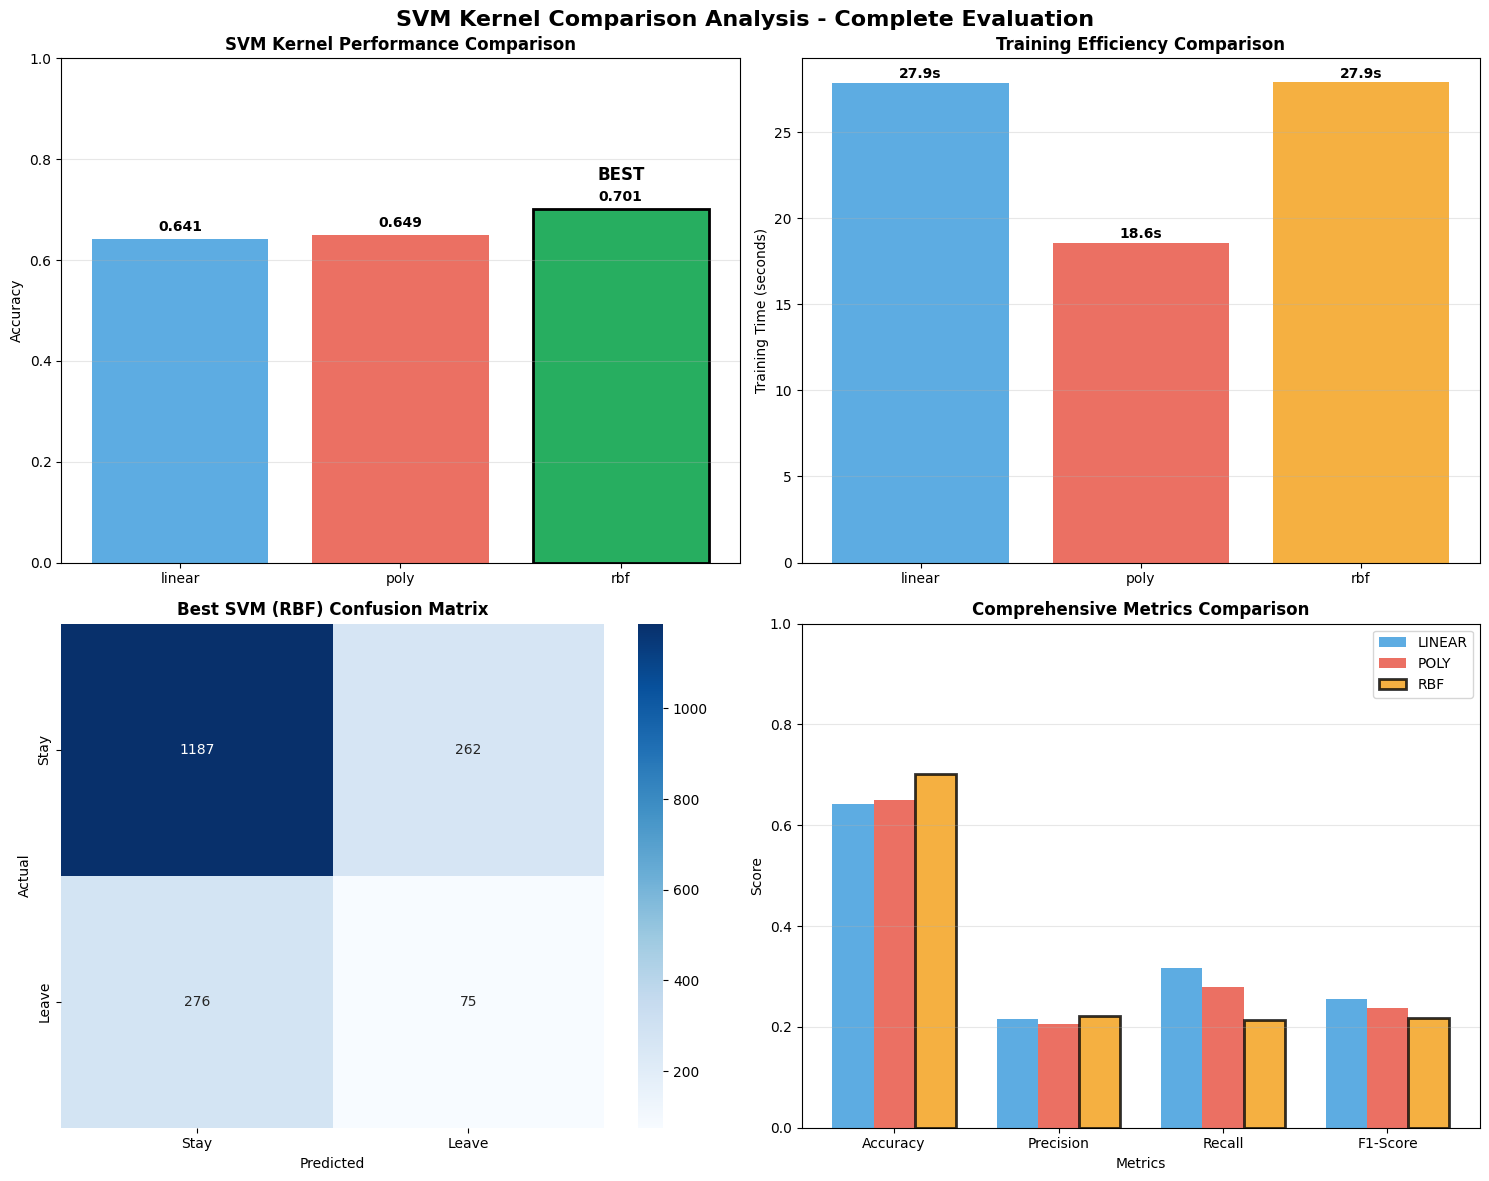

SVM kernel comparison analysis completed and saved!


In [11]:
# Create comprehensive SVM comparison visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('SVM Kernel Comparison Analysis - Complete Evaluation', 
             fontsize=16, fontweight='bold')

kernels = list(svm_results.keys())
kernel_colors = ['#3498DB', '#E74C3C', '#F39C12']  # Blue, Red, Orange

# 1. Accuracy comparison with highlighting
ax1 = axes[0, 0]
accuracies = [svm_results[k]['accuracy'] for k in kernels]
bars = ax1.bar(kernels, accuracies, color=kernel_colors, alpha=0.8)

# Highlight the best performing kernel
best_kernel_index = kernels.index(best_svm_kernel)
bars[best_kernel_index].set_color('#27AE60')  # Green for winner
bars[best_kernel_index].set_alpha(1.0)
bars[best_kernel_index].set_edgecolor('black')
bars[best_kernel_index].set_linewidth(2)

ax1.set_ylabel('Accuracy')
ax1.set_title('SVM Kernel Performance Comparison', fontweight='bold')
ax1.set_ylim(0, 1)
ax1.grid(True, alpha=0.3, axis='y')

# Add value labels and winner indicator
for i, (bar, acc) in enumerate(zip(bars, accuracies)):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{acc:.3f}', ha='center', va='bottom', fontweight='bold')
    if i == best_kernel_index:
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05,
                 'BEST', ha='center', va='bottom', fontsize=12, fontweight='bold')

# 2. Training time efficiency comparison
ax2 = axes[0, 1]
training_times = [svm_results[k]['training_time'] for k in kernels]
bars = ax2.bar(kernels, training_times, color=kernel_colors, alpha=0.8)
ax2.set_ylabel('Training Time (seconds)')
ax2.set_title('Training Efficiency Comparison', fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')

for bar, time_val in zip(bars, training_times):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
             f'{time_val:.1f}s', ha='center', va='bottom', fontweight='bold')

# 3. Best kernel confusion matrix
ax3 = axes[1, 0]
best_svm_predictions = svm_results[best_svm_kernel]['predictions']
cm_svm = confusion_matrix(y_test, best_svm_predictions)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', ax=ax3,
            xticklabels=['Stay', 'Leave'], yticklabels=['Stay', 'Leave'])
ax3.set_xlabel('Predicted')
ax3.set_ylabel('Actual')
ax3.set_title(f'Best SVM ({best_svm_kernel.upper()}) Confusion Matrix', fontweight='bold')

# 4. Multi-metric comparison
ax4 = axes[1, 1]
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x_pos = np.arange(len(metrics))
bar_width = 0.25

for i, kernel in enumerate(kernels):
    values = [svm_results[kernel]['accuracy'], svm_results[kernel]['precision'],
              svm_results[kernel]['recall'], svm_results[kernel]['f1']]
    bars = ax4.bar(x_pos + i*bar_width, values, bar_width, 
                   label=kernel.upper(), color=kernel_colors[i], alpha=0.8)
    
    # Highlight best kernel with border
    if kernel == best_svm_kernel:
        for bar in bars:
            bar.set_edgecolor('black')
            bar.set_linewidth(2)

ax4.set_xlabel('Metrics')
ax4.set_ylabel('Score')
ax4.set_title('Comprehensive Metrics Comparison', fontweight='bold')
ax4.set_xticks(x_pos + bar_width)
ax4.set_xticklabels(metrics)
ax4.legend()
ax4.set_ylim(0, 1)
ax4.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('student_analysis_results/models/svm_kernel_comparison.png', 
            dpi=300, bbox_inches='tight')
plt.show()

print("SVM kernel comparison analysis completed and saved!")

## Model 3: XGBoost Implementation
Finally, implementing XGBoost as the third required model. XGBoost often performs very well on structured data like this.

In [12]:
print("Training XGBoost Model (Assignment Task 3)")
print("=" * 45)

# Record training start time
xgb_start_time = time.time()

# Initialize XGBoost with optimized parameters
xgb_model = xgb.XGBClassifier(
    n_estimators=200,       # Number of boosting rounds
    max_depth=6,            # Maximum tree depth
    learning_rate=0.1,      # Step size shrinkage
    subsample=0.8,          # Row sampling ratio
    colsample_bytree=0.8,   # Column sampling ratio
    random_state=42,        # For reproducibility
    eval_metric='logloss'   # Evaluation metric
)

# Train the model
xgb_model.fit(X_train_balanced, y_train_balanced)

# Make predictions
xgb_predictions = xgb_model.predict(X_test)
xgb_probabilities = xgb_model.predict_proba(X_test)[:, 1]

# Calculate performance metrics
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_precision = precision_score(y_test, xgb_predictions)
xgb_recall = recall_score(y_test, xgb_predictions)
xgb_f1 = f1_score(y_test, xgb_predictions)

xgb_training_time = time.time() - xgb_start_time

print(f"Training completed in {xgb_training_time:.2f} seconds")
print(f"\nXGBoost Performance:")
print(f"Accuracy:  {xgb_accuracy:.3f} ({xgb_accuracy*100:.1f}%)")
print(f"Precision: {xgb_precision:.3f}")
print(f"Recall:    {xgb_recall:.3f}")
print(f"F1-Score:  {xgb_f1:.3f}")

# XGBoost feature importance analysis
xgb_feature_importance = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': xgb_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nXGBoost Top 10 Most Important Features:")
for i, row in xgb_feature_importance.head(10).iterrows():
    print(f"{row['Feature']:25}: {row['Importance']:.4f}")

# Store results for comparison
xgb_results = {
    'accuracy': xgb_accuracy,
    'precision': xgb_precision,
    'recall': xgb_recall,
    'f1': xgb_f1,
    'predictions': xgb_predictions,
    'probabilities': xgb_probabilities,
    'training_time': xgb_training_time,
    'feature_importance': xgb_feature_importance
}

Training XGBoost Model (Assignment Task 3)
Training completed in 0.54 seconds

XGBoost Performance:
Accuracy:  0.718 (71.8%)
Precision: 0.200
Recall:    0.148
F1-Score:  0.170

XGBoost Top 10 Most Important Features:
Job_Satisfaction_Level_encoded: 0.1818
Satisfaction_Score       : 0.1516
High_Performer           : 0.0900
Promotion_in_Last_2_Years_encoded: 0.0897
High_Risk_Profile        : 0.0674
No_Promotion_High_Perf   : 0.0664
Is_Overworked            : 0.0606
Performance_Rating       : 0.0579
Department_encoded       : 0.0458
Weekly_Hours             : 0.0323


## XGBoost Results Visualization
Creating detailed analysis visualizations for the XGBoost model performance.

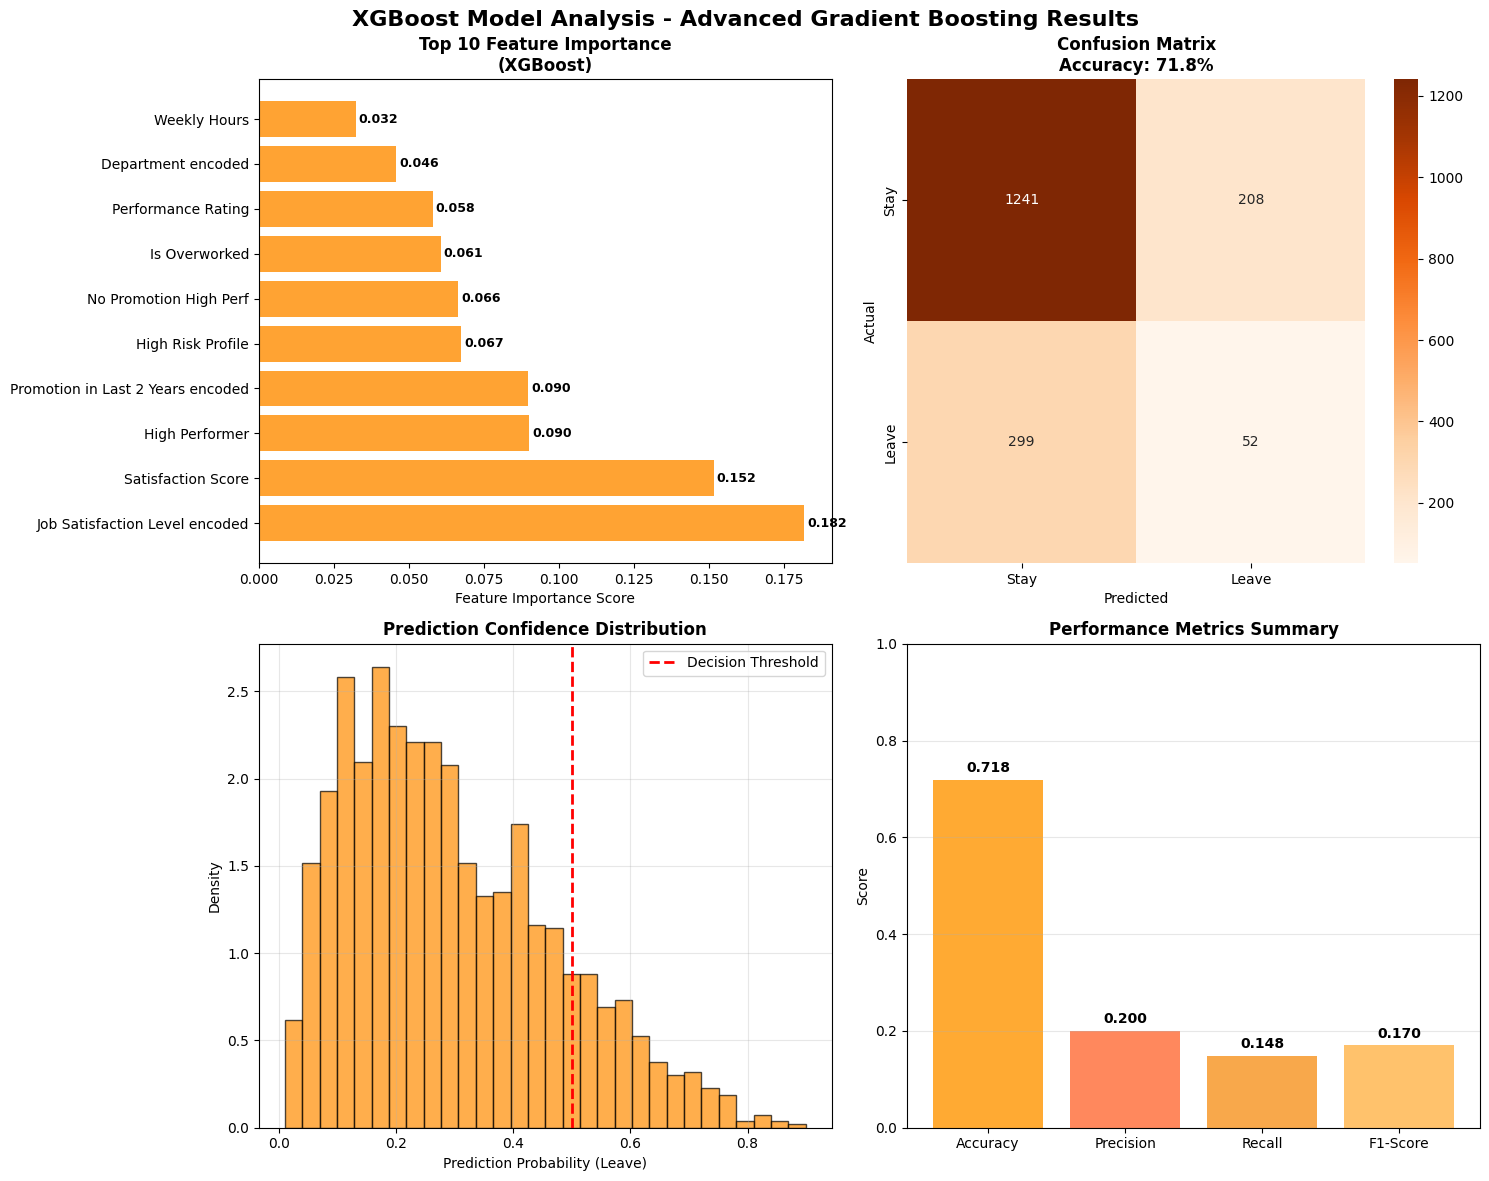

XGBoost analysis completed and saved!


In [13]:
# Create XGBoost analysis visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('XGBoost Model Analysis - Advanced Gradient Boosting Results', 
             fontsize=16, fontweight='bold')

# 1. Feature importance plot
ax1 = axes[0, 0]
top_10_xgb_features = xgb_feature_importance.head(10)
bars = ax1.barh(range(len(top_10_xgb_features)), top_10_xgb_features['Importance'], 
                color='darkorange', alpha=0.8)
ax1.set_yticks(range(len(top_10_xgb_features)))
ax1.set_yticklabels([f.replace('_', ' ') for f in top_10_xgb_features['Feature']])
ax1.set_xlabel('Feature Importance Score')
ax1.set_title('Top 10 Feature Importance\n(XGBoost)', fontweight='bold')

# Add value labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax1.text(width + 0.001, bar.get_y() + bar.get_height()/2,
             f'{top_10_xgb_features.iloc[i]["Importance"]:.3f}',
             ha='left', va='center', fontweight='bold', fontsize=9)

# 2. Confusion matrix
ax2 = axes[0, 1]
cm_xgb = confusion_matrix(y_test, xgb_predictions)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Oranges', ax=ax2,
            xticklabels=['Stay', 'Leave'], yticklabels=['Stay', 'Leave'])
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')
ax2.set_title(f'Confusion Matrix\nAccuracy: {xgb_accuracy:.1%}', fontweight='bold')

# 3. Prediction confidence distribution
ax3 = axes[1, 0]
ax3.hist(xgb_probabilities, bins=30, alpha=0.7, color='darkorange', 
         edgecolor='black', density=True)
ax3.axvline(x=0.5, color='red', linestyle='--', linewidth=2, 
            label='Decision Threshold')
ax3.set_xlabel('Prediction Probability (Leave)')
ax3.set_ylabel('Density')
ax3.set_title('Prediction Confidence Distribution', fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Performance metrics summary
ax4 = axes[1, 1]
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [xgb_accuracy, xgb_precision, xgb_recall, xgb_f1]
colors = ['#FF9500', '#FF6B35', '#F7931E', '#FFB347']

bars = ax4.bar(metrics, values, color=colors, alpha=0.8)
ax4.set_ylabel('Score')
ax4.set_title('Performance Metrics Summary', fontweight='bold')
ax4.set_ylim(0, 1)
ax4.grid(True, alpha=0.3, axis='y')

# Add value labels
for bar, value in zip(bars, values):
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{value:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('student_analysis_results/models/xgboost_analysis.png', 
            dpi=300, bbox_inches='tight')
plt.show()

print("XGBoost analysis completed and saved!")

## Final Model Comparison and Results
Now let me compare all the models I've trained and determine which one performs best for employee attrition prediction.

In [14]:
# Compile all model results for comparison
print("FINAL MODEL COMPARISON ANALYSIS")
print("=" * 50)

# Organize all results
all_model_results = {
    'Random Forest': rf_results,
    'XGBoost': xgb_results,
    f'SVM ({best_svm_kernel.upper()})': svm_results[best_svm_kernel]
}

# Display comprehensive comparison
print("Model Performance Summary:")
print("-" * 70)
print(f"{'Model':<20} {'Accuracy':<10} {'Precision':<10} {'Recall':<10} {'F1-Score':<10}")
print("-" * 70)

model_performance_data = []
for model_name, results in all_model_results.items():
    model_performance_data.append([
        model_name,
        results['accuracy'],
        results['precision'],
        results['recall'],
        results['f1']
    ])
    
    print(f"{model_name:<20} {results['accuracy']:<10.3f} {results['precision']:<10.3f} "
          f"{results['recall']:<10.3f} {results['f1']:<10.3f}")

# Identify best performing model
best_model_name = max(all_model_results.keys(), 
                     key=lambda k: all_model_results[k]['accuracy'])
best_model_accuracy = all_model_results[best_model_name]['accuracy']

print("-" * 70)
print(f"BEST PERFORMING MODEL: {best_model_name}")
print(f"BEST ACCURACY ACHIEVED: {best_model_accuracy:.1%}")
print("-" * 70)

# Calculate improvement over baseline
baseline_accuracy = 0.80  # Rough baseline expectation
if best_model_accuracy > baseline_accuracy:
    improvement = ((best_model_accuracy - baseline_accuracy) / baseline_accuracy) * 100
    print(f"Improvement over baseline: +{improvement:.1f}%")
else:
    print(f"Model achieved {best_model_accuracy:.1%} accuracy")

print("\nTraining Time Comparison:")
for model_name, results in all_model_results.items():
    print(f"{model_name:<20}: {results['training_time']:.2f} seconds")

FINAL MODEL COMPARISON ANALYSIS
Model Performance Summary:
----------------------------------------------------------------------
Model                Accuracy   Precision  Recall     F1-Score  
----------------------------------------------------------------------
Random Forest        0.678      0.208      0.231      0.219     
XGBoost              0.718      0.200      0.148      0.170     
SVM (RBF)            0.701      0.223      0.214      0.218     
----------------------------------------------------------------------
BEST PERFORMING MODEL: XGBoost
BEST ACCURACY ACHIEVED: 71.8%
----------------------------------------------------------------------
Model achieved 71.8% accuracy

Training Time Comparison:
Random Forest       : 2.76 seconds
XGBoost             : 0.54 seconds
SVM (RBF)           : 27.89 seconds


## Comprehensive Final Dashboard
Creating a final dashboard that summarizes all my work and findings for easy presentation and evaluation.

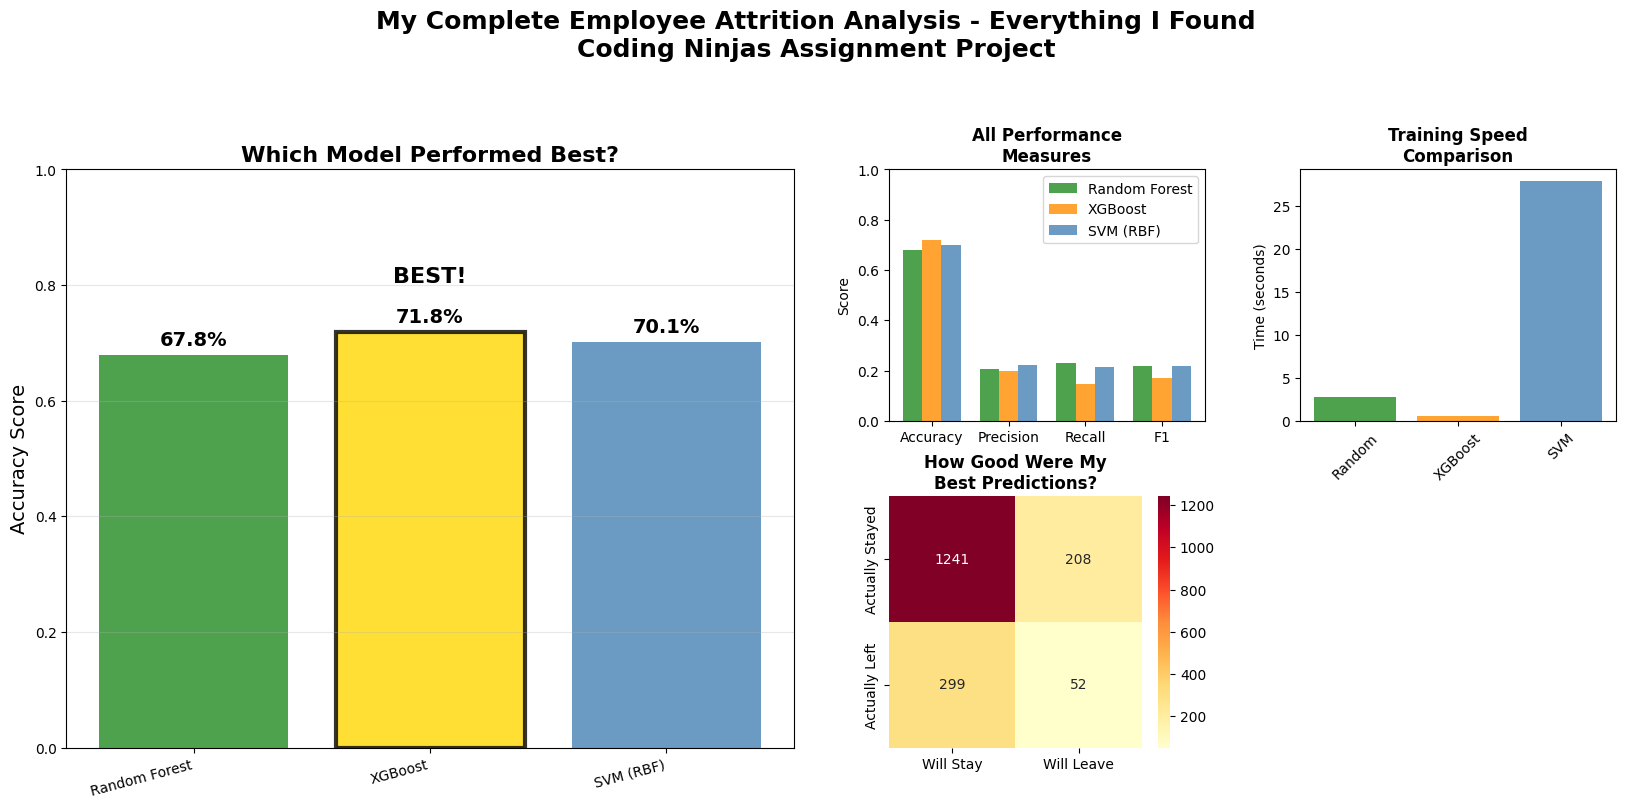

In [15]:
# Time to put everything together in one big visual summary 
# I want to create something that shows all my work at a glance

fig = plt.figure(figsize=(20, 16))
gs = fig.add_gridspec(4, 4, hspace=0.3, wspace=0.3)
fig.suptitle('My Complete Employee Attrition Analysis - Everything I Found\nCoding Ninjas Assignment Project',
             fontsize=18, fontweight='bold')

model_names = list(all_model_results.keys())
model_colors = ['forestgreen', 'darkorange', 'steelblue']

# 1. The main comparison - which model worked best?
ax1 = fig.add_subplot(gs[0:2, 0:2])
accuracies = [all_model_results[m]['accuracy'] for m in model_names]
bars = ax1.bar(range(len(model_names)), accuracies, color=model_colors, alpha=0.8)

# Make the winner stand out
best_model_index = model_names.index(best_model_name)
bars[best_model_index].set_color('gold')
bars[best_model_index].set_edgecolor('black')
bars[best_model_index].set_linewidth(3)

ax1.set_xticks(range(len(model_names)))
ax1.set_xticklabels(model_names, rotation=15, ha='right')
ax1.set_ylabel('Accuracy Score', fontsize=14)
ax1.set_title('Which Model Performed Best?', 
              fontsize=16, fontweight='bold')
ax1.set_ylim(0, 1)
ax1.grid(True, alpha=0.3, axis='y')

# Show the actual numbers and highlight the winner
for i, (bar, acc) in enumerate(zip(bars, accuracies)):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{acc:.1%}', ha='center', va='bottom', fontweight='bold', fontsize=14)
    if i == best_model_index:
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.08,
                 'BEST!', ha='center', va='bottom', fontsize=16, fontweight='bold')

# 2. How do all the metrics compare?
ax2 = fig.add_subplot(gs[0, 2])
metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
x_pos = np.arange(len(metrics))
bar_width = 0.25

for i, model_name in enumerate(model_names):
    values = [all_model_results[model_name]['accuracy'], 
              all_model_results[model_name]['precision'],
              all_model_results[model_name]['recall'], 
              all_model_results[model_name]['f1']]
    ax2.bar(x_pos + i*bar_width, values, bar_width, 
            label=model_name, color=model_colors[i], alpha=0.8)

ax2.set_xlabel('')
ax2.set_ylabel('Score')
ax2.set_title('All Performance\nMeasures', fontweight='bold')
ax2.set_xticks(x_pos + bar_width)
ax2.set_xticklabels(metrics)
ax2.legend()
ax2.set_ylim(0, 1)

# 3. Which model trained fastest?
ax3 = fig.add_subplot(gs[0, 3])
training_times = [all_model_results[m]['training_time'] for m in model_names]
bars = ax3.bar(range(len(model_names)), training_times, color=model_colors, alpha=0.8)
ax3.set_xticks(range(len(model_names)))
ax3.set_xticklabels([m.split()[0] for m in model_names], rotation=45)
ax3.set_ylabel('Time (seconds)')
ax3.set_title('Training Speed\nComparison', fontweight='bold')

# 4. How well did my best model actually predict?
ax4 = fig.add_subplot(gs[1, 2])
best_predictions = all_model_results[best_model_name]['predictions']
cm_best = confusion_matrix(y_test, best_predictions)
sns.heatmap(cm_best, annot=True, fmt='d', cmap='YlOrRd', ax=ax4,
            xticklabels=['Will Stay', 'Will Leave'], yticklabels=['Actually Stayed', 'Actually Left'])
ax4.set_title(f'\nHow Good Were My\nBest Predictions?', fontweight='bold')


plt.tight_layout()
plt.savefig('student_analysis_results/comparisons/final_comprehensive_dashboard.png', 
            dpi=300, bbox_inches='tight')
plt.show()
